In [8]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
import os
os.getcwd()

'/Users/moooooo16/Documents/Computer Vision/Project/src'

In [3]:
os.chdir('../')
os.getcwd()

'/Users/moooooo16/Documents/Computer Vision/Project'

In [4]:
from utils.elpv_reader import load_dataset

images, proba, types = load_dataset()

In [20]:
df = pd.read_csv('labels.csv',
                 sep='\s+',
                 header=None,
                 names=['path', 'label', 'type'])
df.head()

,path,label,type
0,images/cell0001.png,1.0,mono
1,images/cell0002.png,1.0,mono
2,images/cell0003.png,1.0,mono
3,images/cell0004.png,0.0,mono
4,images/cell0005.png,1.0,mono


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2624 entries, 0 to 2623
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   path    2624 non-null   object 
 1   label   2624 non-null   float64
 2   type    2624 non-null   object 
dtypes: float64(1), object(2)
memory usage: 61.6+ KB


In [26]:
df.agg(['count', 'nunique'])

,path,label,type
count,2624,2624,2624
nunique,2624,4,2


In [29]:
df['label'].value_counts()

0.000000    1508
1.000000     715
0.333333     295
0.666667     106
Name: label, dtype: int64

In [30]:
df['type'].value_counts()

poly    1550
mono    1074
Name: type, dtype: int64

In [36]:
df.groupby(['label', 'type']).size()

label     type
0.000000  mono    588
          poly    920
0.333333  mono    117
          poly    178
0.666667  mono     56
          poly     50
1.000000  mono    313
          poly    402
dtype: int64

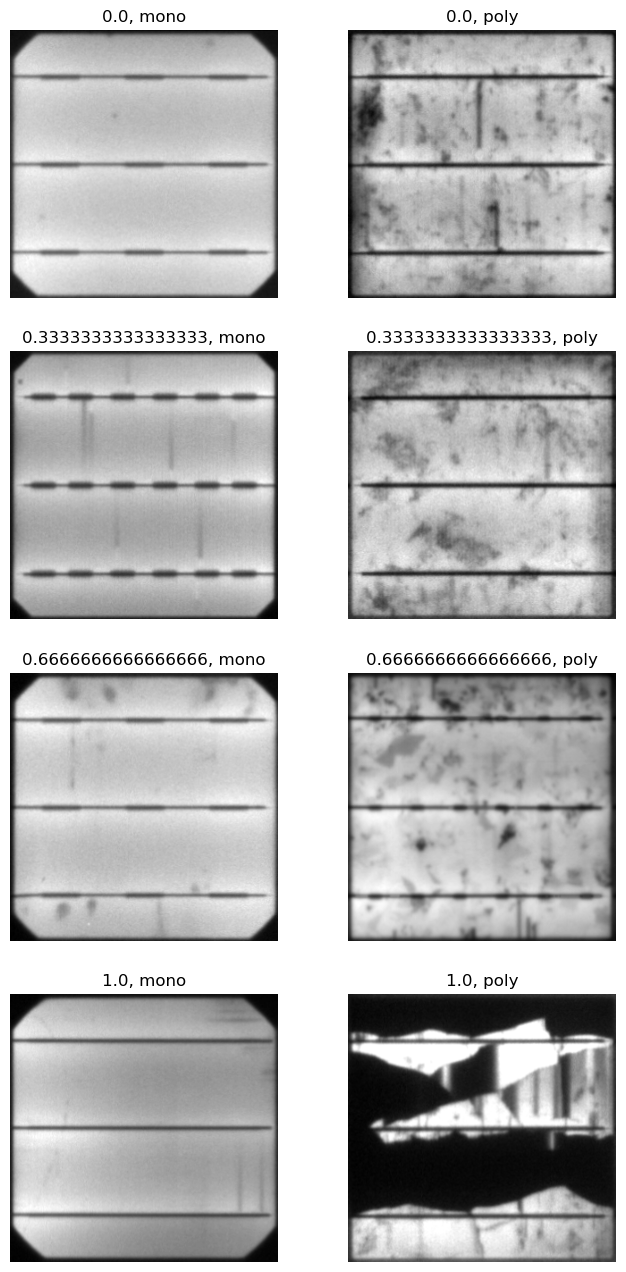

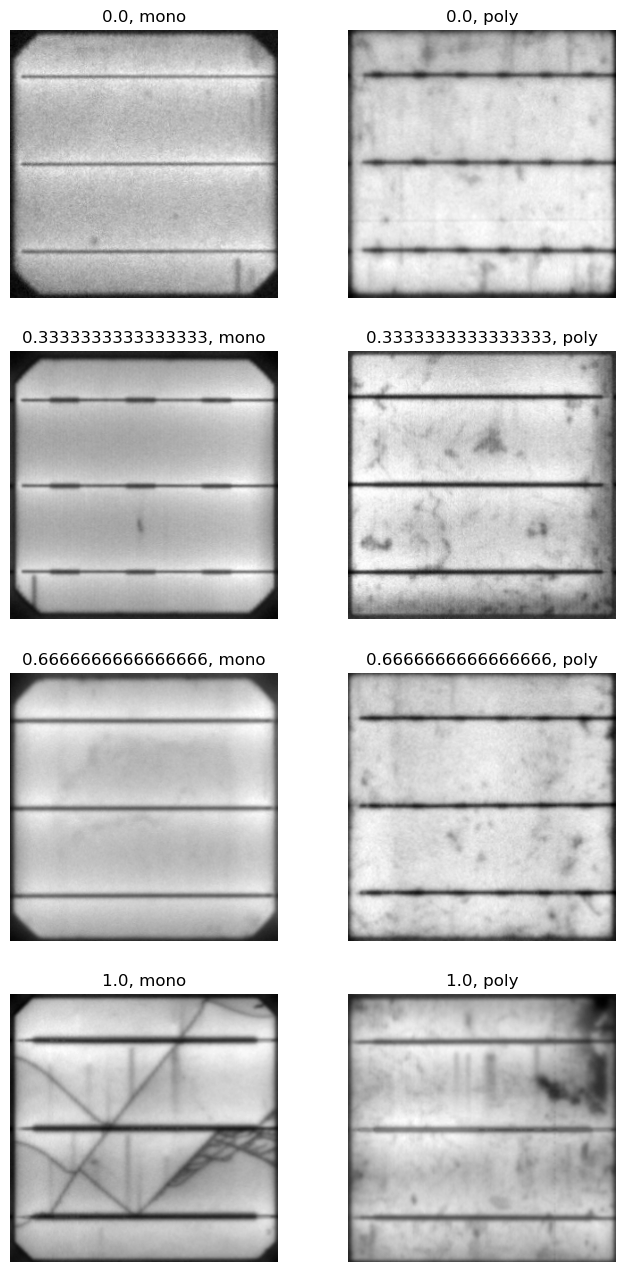

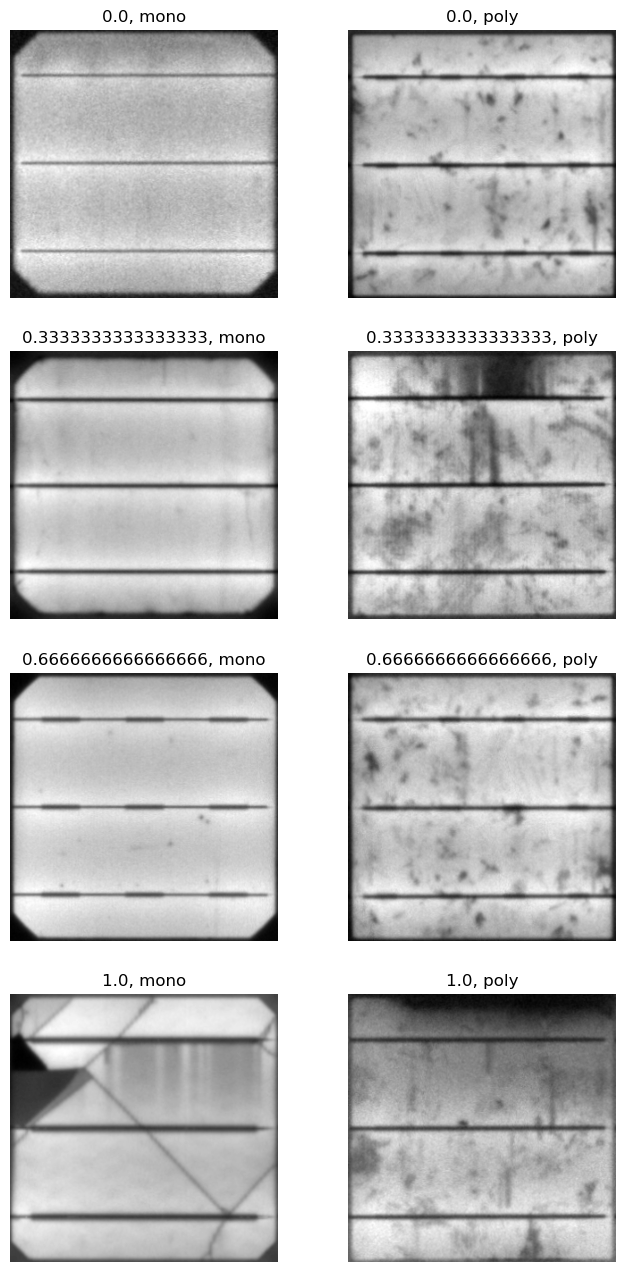

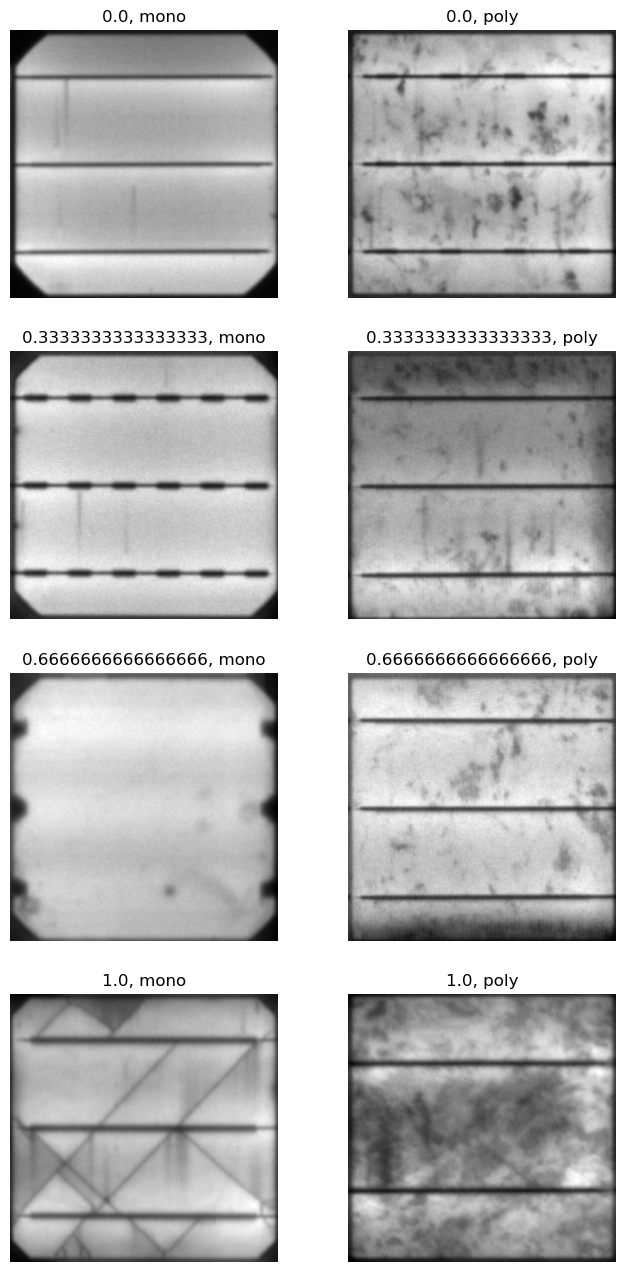

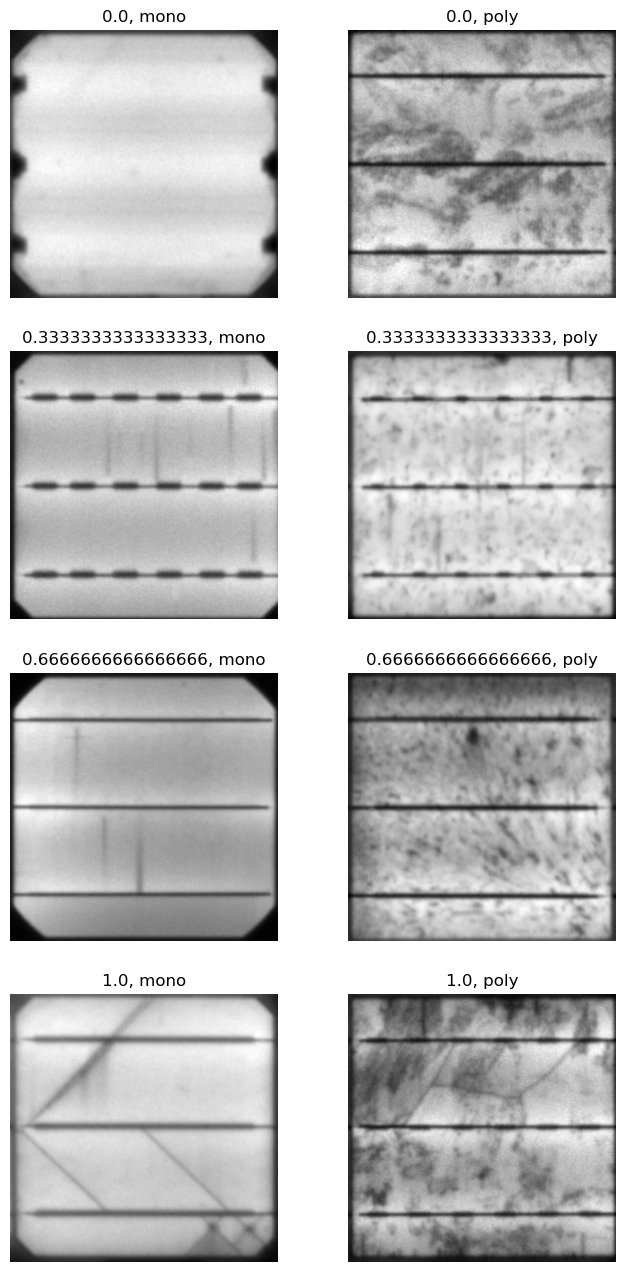

In [54]:
def at_galance(seed = 99):
    grouped = df.groupby(['label', 'type'])
    sample = grouped.apply(lambda x: x.sample(1)).reset_index(drop=True)
    
    
    _, axes = plt.subplots(4, 2, figsize=(8, 16))
    
    for idx, row in sample.iterrows():

        img = plt.imread(row['path'])

        axes[idx//2, idx%2].imshow(img, cmap='gray')
        axes[idx//2, idx%2].set_title(f'{row["label"]}, {row["type"]}')
        axes[idx//2, idx%2].axis('off')
            
    return sample

for i in range(5):
    at_galance(i)
    plt.show()

<Axes: xlabel='label'>

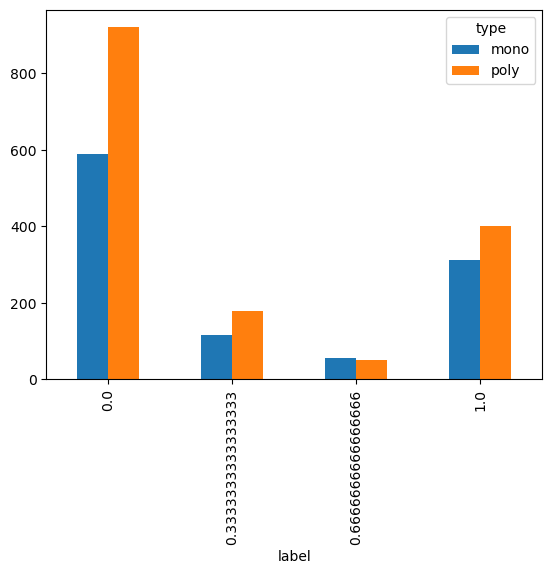

In [57]:
df.groupby(['label', 'type']).size().unstack().plot(kind='bar')